In [27]:
## Pytorch workflow
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.0.1'

In [28]:
what_were_covering = {
                    1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model (training)",
                    4: "making predictions and evaluation a model (inference)",
                    5: "save and load the model",
                    6: "put it all together"

                    }

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model (training)',
 4: 'making predictions and evaluation a model (inference)',
 5: 'save and load the model',
 6: 'put it all together'}

## 1. Data  (preparing and loading)

Data can be almost anything in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

Gradients and slope are the same things.



In [29]:
# Create known parameters.
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
#print(f"X's value {X}")
# Formula below
y = weight * X * bias
print(f"Y's value is: {y}")

X[:10], y[:10]


Y's value is: tensor([[0.0000],
        [0.0042],
        [0.0084],
        [0.0126],
        [0.0168],
        [0.0210],
        [0.0252],
        [0.0294],
        [0.0336],
        [0.0378],
        [0.0420],
        [0.0462],
        [0.0504],
        [0.0546],
        [0.0588],
        [0.0630],
        [0.0672],
        [0.0714],
        [0.0756],
        [0.0798],
        [0.0840],
        [0.0882],
        [0.0924],
        [0.0966],
        [0.1008],
        [0.1050],
        [0.1092],
        [0.1134],
        [0.1176],
        [0.1218],
        [0.1260],
        [0.1302],
        [0.1344],
        [0.1386],
        [0.1428],
        [0.1470],
        [0.1512],
        [0.1554],
        [0.1596],
        [0.1638],
        [0.1680],
        [0.1722],
        [0.1764],
        [0.1806],
        [0.1848],
        [0.1890],
        [0.1932],
        [0.1974],
        [0.2016],
        [0.2058]])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0000],
         [0.0042],
         [0.0084],
         [0.0126],
         [0.0168],
         [0.0210],
         [0.0252],
         [0.0294],
         [0.0336],
         [0.0378]]))

In [30]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with out data.


In [31]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
#print(f"X_test is: {X_train}")
#print(f"y_test is: {X_test}")
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the matplotlib library comes into play.

There is a data explorer's model that comes to play.

"visualize, visualize, visualize!"



In [32]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.0000],
         [0.0042],
         [0.0084],
         [0.0126],
         [0.0168],
         [0.0210],
         [0.0252],
         [0.0294],
         [0.0336],
         [0.0378],
         [0.0420],
         [0.0462],
         [

In [33]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
        Plot training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exists
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

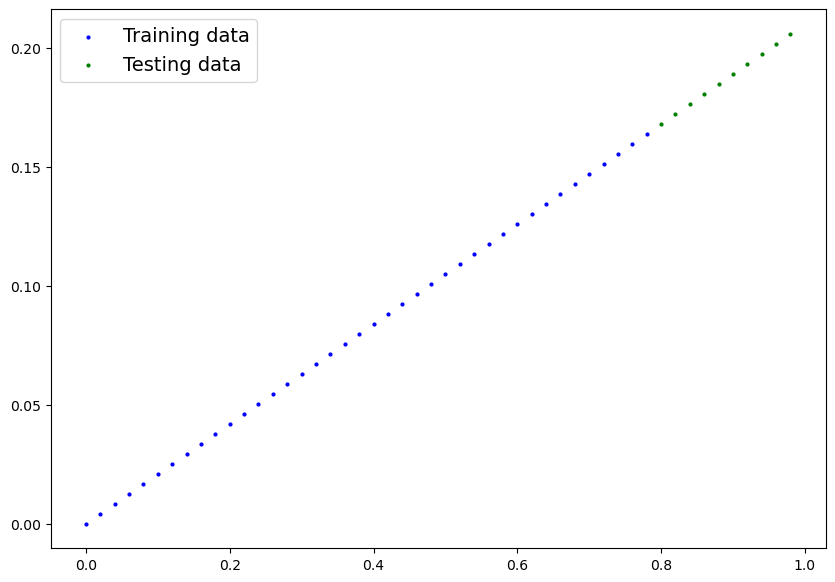

In [34]:
plot_predictions()

2. Building our first model in PyTorch
This is very exciting... let's do it!

We're going to be building classes throughout the course so get better familiar with these...

What our model does:

Start with random values (weight and & bias)
Look for Training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the values).
How does it do so?

Through two main algorithms: Through two main algorithms:

Gradient descent -> required_grads=True
Backpropagation

In [42]:
 #Create linear regression model class, first PyTorch linear progression model
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch imports from nn.Module neural networks.
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, # <- Start with a random weight and try to adjust it to the ideal weight
                                               requires_grad=True, # <- Can this parameter be updated by a gradient descent?
                                               dtype=torch.float)) # <- PyTorch loves this data type torch.float32
        
        self.bias = nn.Parameter(torch.rand(1, # <- Start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # <- Can this parameter be updated by a gradient descent?
                                             dtype=torch.float)) # <- PyTorch loves this data type torch.float32...
        
    # Forward method to define the computation
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is linear regression formula

PyTorch model building essentials
torch.nn - contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
torch.nn.Parameter - what parameters should our model try and learn, often PyTorch layer from torch.nn will set these for us
torch.nn Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent.
def forward() - All nn.Module subclasses require you to overwrite forward() this method defines what happens in the forward computation.

Checking the contents of our PyTorch Module

Now we've check our model or what's inside using our model .parameters()

In [43]:
torch.randn(1)

tensor([0.4740])

torch.randn(1)

In [44]:
# Create a random seed, to keep the numbers consistent.
torch.manual_seed(42)

# Create an instance of LinearRegression class
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [45]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [46]:
weight, bias

(0.7, 0.3)

In [48]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

# Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the forward() method.

In [47]:
# Make predictions with model with inference mode
# Inference mode disables required_grads are keeping less track of data good for speed but not accuracy.
# Think about Inference mode for larger mode, torch.no_grad is old but is in old code.
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [49]:
y_test

tensor([[0.1680],
        [0.1722],
        [0.1764],
        [0.1806],
        [0.1848],
        [0.1890],
        [0.1932],
        [0.1974],
        [0.2016],
        [0.2058]])

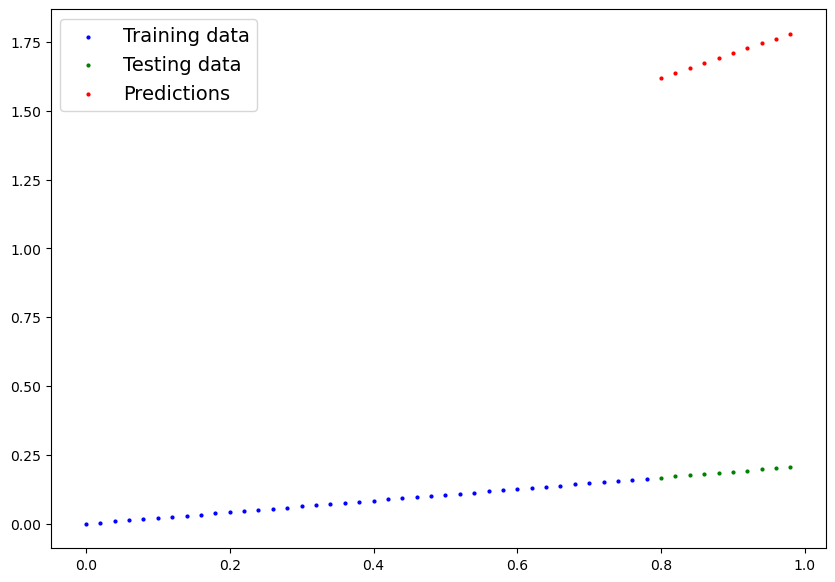

In [50]:
# Visualize, visualize, visualize
plot_predictions(predictions=y_preds)

## 3. Training a model 

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.